In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dataset 

In [2]:
df = pd.read_csv('emails.csv')
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


NOT SPAM  :  4360
SPAM  :  1368


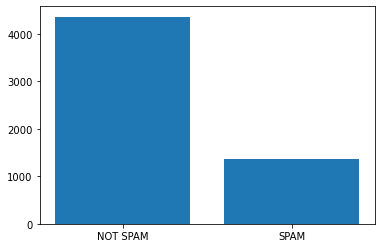

In [10]:
classes = ['NOT SPAM','SPAM']
labels = df['spam']
unique, counts = np.unique(labels, return_counts=True)
values = list(zip(unique, counts))
plt.bar(classes,counts)
for i in values:
    print(classes[i[0]],' : ',i[1])
plt.show()

# Some Emails from Dataset

In [11]:
spam = df.spam
text = df.text
indexes = np.random.randint(low = 10, high = 5000, size = 10)
for i in range(10):
    print(i+1,":" ,text.iloc[indexes[i]])
    print("--"*50)

1 : Subject: boss ' s day  hey everyone ,  i know you may not be aware that boss ' s day oct . 16 , 2000  we will celebrate as a group in the staff meeting on oct . 19 th ,  with the big boss vince kaminski and all the others , however ,  if you would like to do something special for our boss , please  inform me whereby i can make arrangements .  thanks  kevin moore
----------------------------------------------------------------------------------------------------
2 : Subject: reply to your email / ignore my voicemail  please respond to vince :  thanks for that . i just wanted to get a sense from you who the right people  are and how i can establish effective contact . when he went on to different  responsibilities , john goodpasture suggested i get the dialog going with the  right commercial people in enron . i will be in your neighborhood in the 200  pm time range and will give you a quick call . that will conserve your  valuable time and hopefully get me in touch with the right peo

# Preprocessing

In [12]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\iampr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\iampr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
stop_words = set(stopwords.words("english"))
stop_words.remove('not')
lemmatizer = WordNetLemmatizer()
giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|' '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')

def clean_text(text):
    text = re.sub('"', "", text)
    text = re.sub(giant_url_regex, ' ', text)  #remocing the urls
    text = text.lower()
    text = re.sub("[^a-z]+", " ", text) #removing all numbers, special chars like @,#,? etc
    text = text.split()
    text = [word for word in text if not word in stop_words]
    text = [lemmatizer.lemmatize(token) for token in text]
    text = [lemmatizer.lemmatize(token, "v") for token in text]
    text = " ".join(text)
    return text

In [15]:
df['processed_text'] = df.text.apply(lambda x: clean_text(x))   # df.review.map(clean_text) Also can be used
df.head()

,text,spam,processed_text
0,Subject: naturally irresistible your corporate...,1,subject naturally irresistible corporate ident...
1,Subject: the stock trading gunslinger fanny i...,1,subject stock trade gunslinger fanny merrill m...
2,Subject: unbelievable new homes made easy im ...,1,subject unbelievable new home make easy im wan...
3,Subject: 4 color printing special request add...,1,subject color print special request additional...
4,"Subject: do not have money , get software cds ...",1,subject not money get software cd software com...


# Word Frequency and Email Length 

In [16]:
x = df.processed_text
y = df['spam']
print(x.shape)
print(y.shape)

(5728,)
(5728,)


In [20]:
# finding unique words
word_unique = []
for i in x:
    for j in i.split():
        word_unique.append(j)
unique, counts = np.unique(word_unique, return_counts=True)
print("The total words in the emails are : ", len(word_unique))
print("The total UNIQUE words in the emails are : ", len(unique))

The total words in the emails are :  797030
The total UNIQUE words in the emails are :  28080


In [21]:
#Sorting the Unique words based on their Frequency
col = list(zip(unique, counts))
col = sorted(col, key = lambda x: x[1],reverse=True)
col=pd.DataFrame(col)
print("Top 20 Occuring Words with their frequency are:")
col.iloc[:20,:]

Top 20 Occuring Words with their frequency are:


,0,1
0,enron,13382
1,ect,11427
2,subject,10201
3,vince,8532
4,hou,5577
5,com,5443
6,please,5112
7,kaminski,4770
8,not,4575
9,would,4426


In [22]:
col.describe()

,1
count,28080.000000
mean,28.384259
std,200.960010
min,1.000000
25%,1.000000
50%,2.000000
75%,7.000000
max,13382.000000


In [18]:
# finding length of emails
length = []
for i in x:
    length.append(len(i.split()))
print("The Average Length : ",np.mean(length))
print("The max length of : ", np.max(length))
print("The min length of : ", np.min(length))

The Average Length :  139.14629888268158
The max length of :  4167
The min length of :  2


In [19]:
length = pd.DataFrame(length)
length.describe()

,0
count,5728.000000
mean,139.146299
std,182.443202
min,2.000000
25%,48.000000
50%,89.000000
75%,167.000000
max,4167.000000


# TF-IDF

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
vectorizer = TfidfVectorizer(max_features = 15000 )
# tokenize and build vocab

vectorizer.fit(x)
# summarize

print(len(vectorizer.vocabulary_))
print(vectorizer.idf_.shape)

15000
(15000,)


In [26]:
x_tfidf = vectorizer.transform(x).toarray()
print(x_tfidf.shape)

(5728, 15000)


# Machine Learning

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import confusion_matrix, accuracy_score

In [28]:
x_train,x_test,y_train,y_test = tts(x_tfidf,y,test_size = 0.05)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5441, 15000)
(287, 15000)
(5441,)
(287,)


# Naive Bayes

In [29]:
nv = GaussianNB().fit(x_train,y_train)

In [31]:
nv_predict_train = nv.predict(x_train)
report = classification_report(y_train, nv_predict_train)

In [32]:
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4141
           1       0.98      1.00      0.99      1300

    accuracy                           1.00      5441
   macro avg       0.99      1.00      0.99      5441
weighted avg       1.00      1.00      1.00      5441



In [33]:
nv_predict_test = nv.predict(x_test)
report = classification_report(y_test, nv_predict_test)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       219
           1       0.95      0.87      0.91        68

    accuracy                           0.96       287
   macro avg       0.96      0.93      0.94       287
weighted avg       0.96      0.96      0.96       287



# Support Vector Machine

In [39]:
svm_model = LinearSVC(class_weight='balanced', penalty='l2').fit(x_train, y_train)

In [40]:
svm_predict_train = nv.predict(x_train)
report_svm = classification_report(y_train, svm_predict_train)
print(report_svm)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4141
           1       0.98      1.00      0.99      1300

    accuracy                           1.00      5441
   macro avg       0.99      1.00      0.99      5441
weighted avg       1.00      1.00      1.00      5441



In [41]:
svm_predict_test = nv.predict(x_test)
report = classification_report(y_test, svm_predict_test)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       219
           1       0.95      0.87      0.91        68

    accuracy                           0.96       287
   macro avg       0.96      0.93      0.94       287
weighted avg       0.96      0.96      0.96       287



# Logistic Regression

In [42]:
logistic_reg_model = LogisticRegression(penalty='l2',class_weight = 'balanced',verbose=1).fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s finished


In [43]:
lr_model_predict = logistic_reg_model.predict(x_train)
lr_model_report = classification_report(y_train, lr_model_predict)
print(lr_model_report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4141
           1       0.98      1.00      0.99      1300

    accuracy                           0.99      5441
   macro avg       0.99      1.00      0.99      5441
weighted avg       0.99      0.99      0.99      5441



In [44]:
lr_model_predict = logistic_reg_model.predict(x_test)
lr_model_report = classification_report(y_test, lr_model_predict)
print(lr_model_report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       219
           1       0.97      1.00      0.99        68

    accuracy                           0.99       287
   macro avg       0.99      1.00      0.99       287
weighted avg       0.99      0.99      0.99       287

